In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
from sqlalchemy.engine.url import URL
from sqlalchemy import create_engine

from plotnine import *

In [2]:
mydb = URL(drivername='mysql', host='localhost', database="dimRed_contextualEmb", query={'read_default_file':'~/.my.cnf'})
engine = create_engine(mydb)
conn = engine.connect()

In [128]:
query_preds = f"SELECT A.group_id, A.feat, A.value, A.group_norm FROM feat$meta_1gram$T_20$user_id$16to16 A INNER JOIN 20_outcomes B ON A.group_id = B.user_id AND B.facet_fold=1"
user_stats = conn.execute(query_preds).fetchall()
user_stats = pd.DataFrame(user_stats, columns=["user_id", "feat", "value", "group_norm"])
user_stats

,user_id,feat,value,group_norm
0,507427,_avg1gramLength,4,4.021986
1,507427,_avg1gramsPerMsg,13,13.177570
2,507427,_total1grams,1410,1410.000000
3,1237298,_avg1gramLength,2,1.997390
4,1237298,_avg1gramsPerMsg,39,38.660550
...,...,...,...,...
14995,100002308438946,_avg1gramsPerMsg,42,42.293578
14996,100002308438946,_total1grams,4610,4610.000000
14997,100002405455866,_avg1gramLength,4,4.154056
14998,100002405455866,_avg1gramsPerMsg,32,31.667732


In [4]:
query_preds = f"SELECT A.group_id, A.feat, A.value, A.group_norm FROM feat$meta_1gram$T_20msg20$user_id$16to16 A INNER JOIN 20_outcomes B ON A.group_id = B.user_id AND B.facet_fold=1"
user_stats_FT = conn.execute(query_preds).fetchall()
user_stats_FT = pd.DataFrame(user_stats_FT, columns=["user_id", "feat", "value", "group_norm"])
user_stats_FT = user_stats_FT[user_stats_FT.feat != "_totalMsgs"].reset_index(drop=True)
user_stats_FT

,user_id,feat,value,group_norm
0,507427,_avg1gramLength,4,4.148936
1,507427,_avg1gramsPerMsg,9,9.400000
2,507427,_total1grams,188,188.000000
3,1237298,_avg1gramLength,2,2.469091
4,1237298,_avg1gramsPerMsg,14,13.750000
...,...,...,...,...
14995,100002308438946,_avg1gramsPerMsg,28,28.150000
14996,100002308438946,_total1grams,563,563.000000
14997,100002405455866,_avg1gramLength,4,4.280603
14998,100002405455866,_avg1gramsPerMsg,27,26.550000


In [5]:
query_preds = f"SELECT * FROM delerror_nmf_rpca_roba_abs_age"
delErr_age = conn.execute(query_preds).fetchall()
delErr_age = pd.DataFrame(delErr_age, columns=["user_id", "feat", "age", "del_rpca", "del_nmf", "del_roba", "del_rpca_roba_abs", "del_nmf_roba_abs", "del_rpca_nmf_abs"])
delErr_age

,user_id,feat,age,del_rpca,del_nmf,del_roba,del_rpca_roba_abs,del_nmf_roba_abs,del_rpca_nmf_abs
0,507427,age_N500_bs5,23,5.006242,4.557411,2.843383,2.162858,1.714027,0.448831
1,507427,age_N500_bs1,23,4.675235,4.875130,3.468992,1.206243,1.406138,-0.199895
2,507427,age_N500_bs0,23,6.212092,4.511750,6.187801,0.024290,-1.676052,1.700342
3,507427,age,23,5.220805,5.783625,2.159234,3.061571,3.624391,-0.562820
4,507427,age_N500_bs7,23,4.707172,4.141455,3.457159,1.250013,0.684296,0.565717
...,...,...,...,...,...,...,...,...,...
54962,100002405455866,age_N500_bs3,21,3.755895,2.345081,4.066114,-0.310219,-1.721034,1.410815
54963,100002405455866,age_N500_bs6,21,4.727114,3.656846,5.309785,-0.582670,-1.652938,1.070268
54964,100002405455866,age_N500_bs8,21,3.994836,3.136423,3.557666,0.437170,-0.421243,0.858413
54965,100002405455866,age_N500_bs2,21,5.818908,5.204625,5.336584,0.482323,-0.131959,0.614283


In [6]:
query_preds = f"SELECT * FROM delerror_roba_ft_abs_age"
delErr_age_FT = conn.execute(query_preds).fetchall()
delErr_age_FT = pd.DataFrame(delErr_age_FT, columns=["user_id", "roba_ft", "age"])
delErr_age_FT

,user_id,roba_ft,age
0,507427,4.506853,23.0
1,1237298,-3.899781,28.0
2,1526541,1.725965,23.0
3,1935586,-1.009585,22.0
4,2063695,-2.461610,22.0
...,...,...,...
4995,100002084836097,-7.075330,14.0
4996,100002183886566,-20.506558,33.0
4997,100002215506152,-1.226064,24.0
4998,100002308438946,1.646529,18.0


In [105]:
query_preds = f"SELECT * FROM delerror_nmf_rpca_roba_abs_ext"
delErr_ext = conn.execute(query_preds).fetchall()
delErr_ext = pd.DataFrame(delErr_ext, columns=["user_id", "feat", "ext", "del_rpca", "del_nmf", "del_roba", "del_rpca_roba_abs", "del_nmf_roba_abs", "del_rpca_nmf_abs"])
delErr_ext

,user_id,feat,ext,del_rpca,del_nmf,del_roba,del_rpca_roba_abs,del_nmf_roba_abs,del_rpca_nmf_abs
0,507427,ext_N500_bs5,-0.64,0.557597,0.520212,0.452456,0.105141,0.067755,0.037386
1,507427,ext_N500_bs7,-0.64,0.128268,0.338376,0.148213,-0.019945,0.190163,-0.210108
2,507427,ext_N500_bs3,-0.64,0.032896,0.035948,0.021098,0.011797,0.014849,-0.003052
3,507427,ext_N500_bs1,-0.64,0.194904,0.079657,0.271086,-0.076182,-0.191429,0.115247
4,507427,ext_N500_bs6,-0.64,0.526799,0.547057,0.551911,-0.025112,-0.004854,-0.020258
...,...,...,...,...,...,...,...,...,...
54962,100002405455866,ext_N500_bs0,-1.21,1.466497,1.388122,1.482430,-0.015933,-0.094307,0.078375
54963,100002405455866,ext,-1.21,0.895344,0.903076,0.897098,-0.001754,0.005979,-0.007732
54964,100002405455866,ext_N500_bs4,-1.21,1.074630,1.118291,1.035085,0.039545,0.083206,-0.043661
54965,100002405455866,ext_N500_bs2,-1.21,1.263845,1.245309,1.150943,0.112902,0.094366,0.018536


In [8]:
query_preds = f"SELECT * FROM delerror_nmf_rpca_roba_abs_ope"
delErr_ope = conn.execute(query_preds).fetchall()
delErr_ope = pd.DataFrame(delErr_ope, columns=["user_id", "feat", "ope", "del_rpca", "del_nmf", "del_roba", "del_rpca_roba_abs", "del_nmf_roba_abs", "del_rpca_nmf_abs"])
delErr_ope

,user_id,feat,ope,del_rpca,del_nmf,del_roba,del_rpca_roba_abs,del_nmf_roba_abs,del_rpca_nmf_abs
0,507427,ope_N500_bs2,1.22,1.300672,1.201987,1.201942,0.098731,0.000046,0.098685
1,507427,ope_N500_bs3,1.22,1.570252,1.432285,1.474015,0.096237,-0.041730,0.137967
2,507427,ope_N500_bs6,1.22,1.388498,1.176752,1.278691,0.109807,-0.101939,0.211746
3,507427,ope_N500_bs8,1.22,1.238342,1.187616,1.200981,0.037361,-0.013365,0.050726
4,507427,ope_N500_bs1,1.22,0.991078,0.962717,0.952113,0.038965,0.010604,0.028361
...,...,...,...,...,...,...,...,...,...
54962,100002405455866,ope,0.11,0.260555,0.227074,0.291266,-0.030711,-0.064192,0.033481
54963,100002405455866,ope_N500_bs0,0.11,0.754618,0.507311,0.671821,0.082797,-0.164510,0.247307
54964,100002405455866,ope_N500_bs5,0.11,0.256046,0.256320,0.411679,-0.155633,-0.155359,-0.000274
54965,100002405455866,ope_N500_bs4,0.11,0.339756,0.257333,0.349379,-0.009622,-0.092046,0.082424


In [104]:
query_preds = f"SELECT * FROM delerror_nmf_rpca_roba_abs_bsag"
delErr_bsag = conn.execute(query_preds).fetchall()
delErr_bsag = pd.DataFrame(delErr_bsag, columns=["user_id", "feat", "bsag", "del_rpca", "del_nmf", "del_roba", "del_rpca_roba_abs", "del_nmf_roba_abs", "del_rpca_nmf_abs"])
delErr_bsag

,user_id,feat,bsag,del_rpca,del_nmf,del_roba,del_rpca_roba_abs,del_nmf_roba_abs,del_rpca_nmf_abs
0,clp187b977ec9,a11_bsag_total_N500_bs4,12,2.609797,3.222646,2.589975,0.019822,0.632671,-0.612850
1,clp187b977ec9,a11_bsag_total_N500_bs0,12,3.396128,1.193257,7.607444,-4.211315,-6.414187,2.202872
2,clp187b977ec9,a11_bsag_total_N500_bs7,12,0.809275,2.009611,4.450105,-3.640829,-2.440493,-1.200336
3,clp187b977ec9,a11_bsag_total_N500_bs3,12,3.992234,3.265773,5.495740,-1.503506,-2.229967,0.726461
4,clp187b977ec9,a11_bsag_total,12,4.124607,4.057620,7.211970,-3.087363,-3.154351,0.066988
...,...,...,...,...,...,...,...,...,...
10907,clp1851c9c3c2,a11_bsag_total_N500_bs2,6,1.437128,1.916768,0.500288,0.936839,1.416479,-0.479640
10908,clp1851c9c3c2,a11_bsag_total_N500_bs8,6,1.806495,0.549842,0.356049,1.450446,0.193793,1.256653
10909,clp1851c9c3c2,a11_bsag_total_N500_bs9,6,0.334133,1.761674,0.357726,-0.023594,1.403948,-1.427541
10910,clp1851c9c3c2,a11_bsag_total_N500_bs1,6,1.374670,2.219753,1.100640,0.274030,1.119113,-0.845082


In [9]:
delErr_age_FT_stats = pd.merge(delErr_age_FT, user_stats_FT, on="user_id")
delErr_age_FT_stats["delErr_type"] = "roba_ft"
delErr_age_FT_stats.rename(columns={"roba_ft":"delErr"}, inplace=True)

delErr_age_FT_stats.loc[delErr_age_FT_stats.feat == "_total1grams","group_norm"] = np.log(delErr_age_FT_stats[delErr_age_FT_stats.feat == "_total1grams"]["group_norm"])
#delErr_age_FT_stats = delErr_age_FT_stats[delErr_age_FT_stats.feat == '_avg1gramsPerMsg']
delErr_age_FT_stats.loc[delErr_age_FT_stats.feat == "_total1grams", "feat"] = "log(_total1grams)" 


delErr_age_FT_stats

,user_id,delErr,age,feat,value,group_norm,delErr_type
0,507427,4.506853,23.0,_avg1gramLength,4,4.148936,roba_ft
1,507427,4.506853,23.0,_avg1gramsPerMsg,9,9.400000,roba_ft
2,507427,4.506853,23.0,log(_total1grams),188,5.236442,roba_ft
3,1237298,-3.899781,28.0,_avg1gramLength,2,2.469091,roba_ft
4,1237298,-3.899781,28.0,_avg1gramsPerMsg,14,13.750000,roba_ft
...,...,...,...,...,...,...,...
14995,100002308438946,1.646529,18.0,_avg1gramsPerMsg,28,28.150000,roba_ft
14996,100002308438946,1.646529,18.0,log(_total1grams),563,6.333280,roba_ft
14997,100002405455866,2.946917,21.0,_avg1gramLength,4,4.280603,roba_ft
14998,100002405455866,2.946917,21.0,_avg1gramsPerMsg,27,26.550000,roba_ft


# Age

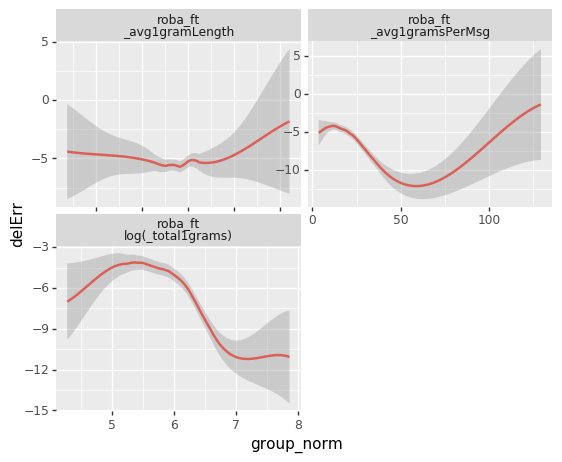

<ggplot: (8772225632667)>

In [10]:
df, x, facet = delErr_age_FT_stats, "group_norm", "~ delErr_type + feat"

def plot (df,x, facet):
    
    return    ( ggplot(df, aes(x=f'{x}', y='delErr', color="delErr_type"))
    + geom_smooth(span=0.5, show_legend=False, method="loess", size=1, method_args={'degree':1})
    + facet_wrap(f"{facet}", ncol=2, scales="free"))

plot (df, x, facet)

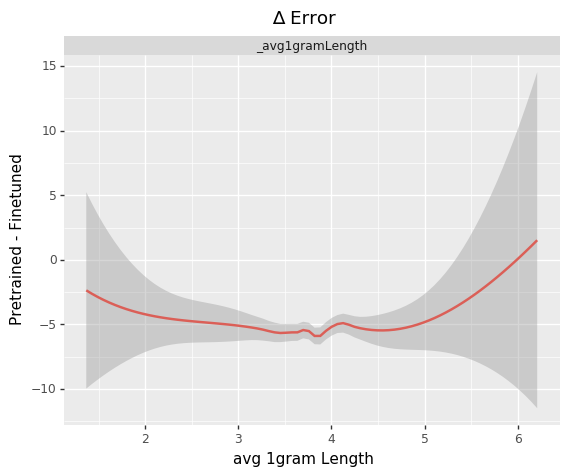

<ggplot: (8772222778204)>

In [11]:
df, x, facet = delErr_age_FT_stats[delErr_age_FT_stats.feat == "_avg1gramLength"], "group_norm", "feat"
plot = (ggplot(df, aes(x=f'{x}', y='delErr', color="delErr_type"))
    + geom_smooth(span=0.5, show_legend=False, method="loess", method_args={'degree':2})
    + facet_wrap(f"{facet}", ncol=2, scales="free")
    + xlab("avg 1gram Length")
    + ylab("Pretrained - Finetuned")
    + ggtitle("∆ Error"))

plot

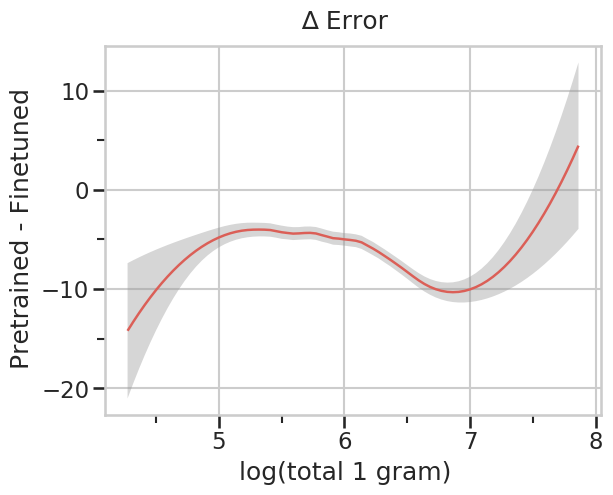

<ggplot: (-9223363264631995953)>

In [12]:
df, x, facet = delErr_age_FT_stats[delErr_age_FT_stats.feat == "log(_total1grams)"], "group_norm", "feat"
plot = (   ggplot(df, aes(x=f'{x}', y='delErr', color="delErr_type"))
    + geom_smooth(span=0.5, show_legend=False, method="loess", size=1, method_args={'degree':2})
    #+ facet_wrap(f"{facet}", ncol=2, scales="free")
    + xlab("log(total 1 gram)")
    + ylab("Pretrained - Finetuned")
    + ggtitle("∆ Error")
    + theme_seaborn(style="whitegrid", context="talk"))


#plot.save(filename="./ErrorAnalysis/Roba_FTdeltaErrorTotal1grams.png", format="png")
plot 

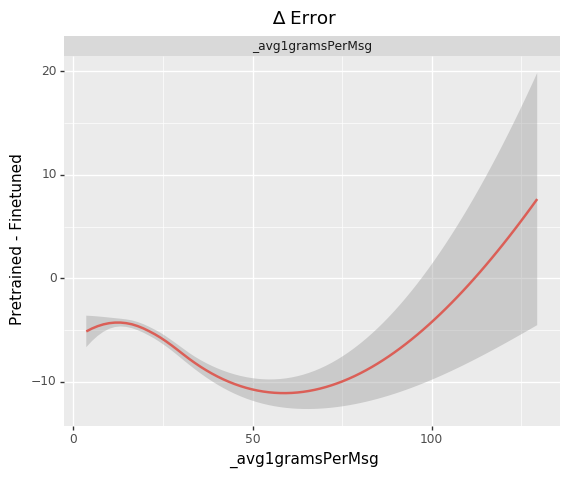

<ggplot: (-9223363264631994680)>

In [13]:
df, x, facet = delErr_age_FT_stats[delErr_age_FT_stats.feat == "_avg1gramsPerMsg"], "group_norm", "feat"
plot = (   ggplot(df, aes(x=f'{x}', y='delErr', color="delErr_type"))
    + geom_smooth(span=0.95, show_legend=False, method="loess", size=1, method_args={'degree':2})
    + facet_wrap(f"{facet}", ncol=2, scales="free")
    + xlab("_avg1gramsPerMsg")
    + ylab("Pretrained - Finetuned")
    + ggtitle("∆ Error"))

#plot.save(filename="./ErrorAnalysis/Roba_FTdeltaErrorAvg1gramsPerMsg.png", format="png")
plot

In [46]:
query = "SELECT a.user_id, ABS(a.pred - a.age) as delErr_FT, ABS(b.group_norm - a.age) AS delErr_roba FROM roba_FT_20msg20_age_error AS a INNER JOIN feat$p_ridg_roba_768_msg20fold4_age$T_20$user_id AS b ON a.user_id = b.group_id"
result_1 = conn.execute(query).fetchall()
result_1 = pd.DataFrame(result_1, columns = ["user_id", "delErr_FT", "delErr_roba"])
result_1 = pd.merge(result_1, user_stats_FT, on="user_id")
result_1

,user_id,delErr_FT,delErr_roba,feat,value,group_norm
0,507427,0.158434,4.665287,_avg1gramLength,4,4.148936
1,507427,0.158434,4.665287,_avg1gramsPerMsg,9,9.400000
2,507427,0.158434,4.665287,_total1grams,188,188.000000
3,1237298,4.430466,0.530685,_avg1gramLength,2,2.469091
4,1237298,4.430466,0.530685,_avg1gramsPerMsg,14,13.750000
...,...,...,...,...,...,...
14995,100002308438946,6.944439,8.590968,_avg1gramsPerMsg,28,28.150000
14996,100002308438946,6.944439,8.590968,_total1grams,563,563.000000
14997,100002405455866,3.431484,6.378401,_avg1gramLength,4,4.280603
14998,100002405455866,3.431484,6.378401,_avg1gramsPerMsg,27,26.550000


In [15]:
result_1.loc[result_1.feat == "_total1grams","group_norm"] = np.log(result_1[result_1.feat == "_total1grams"]["group_norm"])
result_1.loc[result_1.feat == "_total1grams", "feat"] = "log(_total1grams)" 

temp = [result_1[["user_id", "feat", "group_norm", "delErr_roba"]], result_1[["user_id", "feat", "group_norm", "delErr_FT"]]]
for i in temp:
    i["delErr_type"] = "Fine-Tuned" if "delErr_FT" in i.columns else "Pre-Trained"
    i.columns = ["user_id", "feat", "group_norm", "delErr", "delErr_type"]
    

result_1 = pd.concat(temp, axis=0)

result_1

,user_id,feat,group_norm,delErr,delErr_type
0,507427,_avg1gramLength,4.148936,4.665287,Pre-Trained
1,507427,_avg1gramsPerMsg,9.400000,4.665287,Pre-Trained
2,507427,log(_total1grams),5.236442,4.665287,Pre-Trained
3,1237298,_avg1gramLength,2.469091,0.530685,Pre-Trained
4,1237298,_avg1gramsPerMsg,13.750000,0.530685,Pre-Trained
...,...,...,...,...,...
14995,100002308438946,_avg1gramsPerMsg,28.150000,6.944439,Fine-Tuned
14996,100002308438946,log(_total1grams),6.333280,6.944439,Fine-Tuned
14997,100002405455866,_avg1gramLength,4.280603,3.431484,Fine-Tuned
14998,100002405455866,_avg1gramsPerMsg,26.550000,3.431484,Fine-Tuned


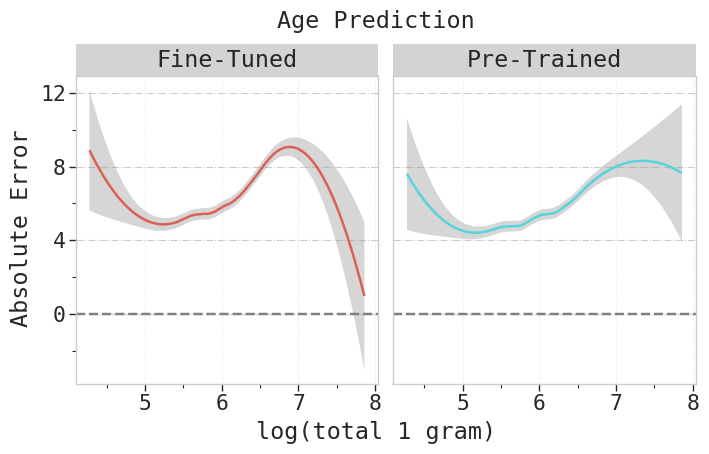

<ggplot: (8760695792041)>

In [134]:
df, x, facet = result_1[result_1.feat == "log(_total1grams)"], "group_norm", "delErr_type"

def plotter(df, x, y, title=None, facet=None):
    plot = (ggplot(df, aes(x=f'{x}', y=f'{y}', color=f"{facet}"))
        + geom_smooth(span=0.5, show_legend=False, method="loess", size=1, method_args={'degree':2})
        + labs(x="log(total 1 gram)", y="Absolute Error")
        + theme_seaborn(style="whitegrid", context="paper", font_scale=1.75, font="monospace")
        + geom_hline(yintercept = 0, color='gray', size=1, linetype="dashed")
        + theme(subplots_adjust={'wspace': 0.05}, figure_size=(8, 4), legend_title=element_blank(), panel_grid_major_x=element_line(linetype='dashed', alpha=0.25), panel_grid_major_y=element_line(linetype='dashdot',))
        + ggtitle("Age Prediction")
        
        #+ scale_y_continuous(breaks = range(-1,12,2))
        )
    if facet is not None: plot = plot + facet_wrap(f"{facet}", ncol=2, scales="fixed") 
    if title is not None: plot = plot + ggtitle(f"{title}")
    return plot


plot = plotter(df, x, "delErr", facet=facet) 
#plot.save(filename="./ErrorAnalysis/Roba_FTdeltaErrorTotal1grams_cols.pdf", format="pdf", dpi=250)
plot

In [56]:
delErr_age_FT_p9 = []
for i in ['delErr_FT', 'delErr_roba']:
    temp = result_1[["user_id", f"{i}"]]
    temp = temp.rename(columns={i:"delErr_model"})
    temp["delErr_model_type"] = i
    delErr_age_FT_p9.append(temp)

delErr_age_FT_p9 = pd.concat(delErr_age_FT_p9, axis=0)
delErr_age_FT_p9

,user_id,delErr_model,delErr_model_type
0,507427,0.158434,delErr_FT
1,507427,0.158434,delErr_FT
2,507427,0.158434,delErr_FT
3,1237298,4.430466,delErr_FT
4,1237298,4.430466,delErr_FT
...,...,...,...
14995,100002308438946,8.590968,delErr_roba
14996,100002308438946,8.590968,delErr_roba
14997,100002405455866,6.378401,delErr_roba
14998,100002405455866,6.378401,delErr_roba


In [67]:
np.sort(liwc_stats.feat.unique())

array(['ACHIEVE', 'ADJ', 'ADVERB', 'AFFECT', 'AFFILIATION', 'ANGER',
       'ANX', 'ARTICLE', 'ASSENT', 'AUXVERB', 'BIO', 'BODY', 'CAUSE',
       'CERTAIN', 'COGPROC', 'COMPARE', 'CONJ', 'DEATH', 'DIFFER',
       'DISCREP', 'DRIVES', 'FAMILY', 'FEEL', 'FEMALE', 'FILLER',
       'FOCUSFUTURE', 'FOCUSPAST', 'FOCUSPRESENT', 'FRIEND', 'FUNCTION',
       'HEALTH', 'HEAR', 'HOME', 'I', 'INFORMAL', 'INGEST', 'INSIGHT',
       'INTERROG', 'IPRON', 'LEISURE', 'MALE', 'MONEY', 'MOTION',
       'NEGATE', 'NEGEMO', 'NETSPEAK', 'NONFLU', 'NUMBER', 'PERCEPT',
       'POSEMO', 'POWER', 'PPRON', 'PREP', 'PRONOUN', 'QUANT', 'RELATIV',
       'RELIG', 'REWARD', 'RISK', 'SAD', 'SEE', 'SEXUAL', 'SHEHE',
       'SOCIAL', 'SPACE', 'SWEAR', 'TENTAT', 'THEY', 'TIME', 'VERB', 'WE',
       'WORK', 'YOU', '_intercept'], dtype=object)

In [57]:
query = "SELECT * FROM feat$cat_LIWC2015$T_20msg20$user_id$1gra"
liwc_stats = conn.execute(query).fetchall()
liwc_stats = pd.DataFrame(liwc_stats, columns=["id", "group_id", "feat", "value", "group_norm"])


,user_id,delErr_model,delErr_model_type,feat,group_norm
0,507427,0.158434,delErr_FT,NETSPEAK,0.010638
1,507427,0.158434,delErr_FT,NEGEMO,0.005319
2,507427,0.158434,delErr_FT,INFORMAL,0.042553
3,507427,0.158434,delErr_FT,SWEAR,0.005319
4,507427,0.158434,delErr_FT,NETSPEAK,0.010638
...,...,...,...,...,...
130873,100002405455866,6.378401,delErr_roba,NETSPEAK,0.013183
130874,100002405455866,6.378401,delErr_roba,ANGER,0.009416
130875,100002405455866,6.378401,delErr_roba,NEGEMO,0.035782
130876,100002405455866,6.378401,delErr_roba,INFORMAL,0.020716


In [80]:
social_liwc_stats = liwc_stats[liwc_stats.feat.isin(["FUNCTION", "ARTICLE", "FAMILY", "FRIEND", "COGPROC"])]
social_liwc_stats = social_liwc_stats.rename(columns={"group_id":"user_id"})
delErr_age_liwc = pd.merge(delErr_age_FT_p9, social_liwc_stats[["user_id", "feat", "group_norm"]], on="user_id")
delErr_age_liwc

,user_id,delErr_model,delErr_model_type,feat,group_norm
0,507427,0.158434,delErr_FT,COGPROC,0.117021
1,507427,0.158434,delErr_FT,FUNCTION,0.372340
2,507427,0.158434,delErr_FT,ARTICLE,0.042553
3,507427,0.158434,delErr_FT,COGPROC,0.117021
4,507427,0.158434,delErr_FT,FUNCTION,0.372340
...,...,...,...,...,...
127321,100002405455866,6.378401,delErr_roba,FUNCTION,0.459510
127322,100002405455866,6.378401,delErr_roba,COGPROC,0.097928
127323,100002405455866,6.378401,delErr_roba,FRIEND,0.007533
127324,100002405455866,6.378401,delErr_roba,ARTICLE,0.045198


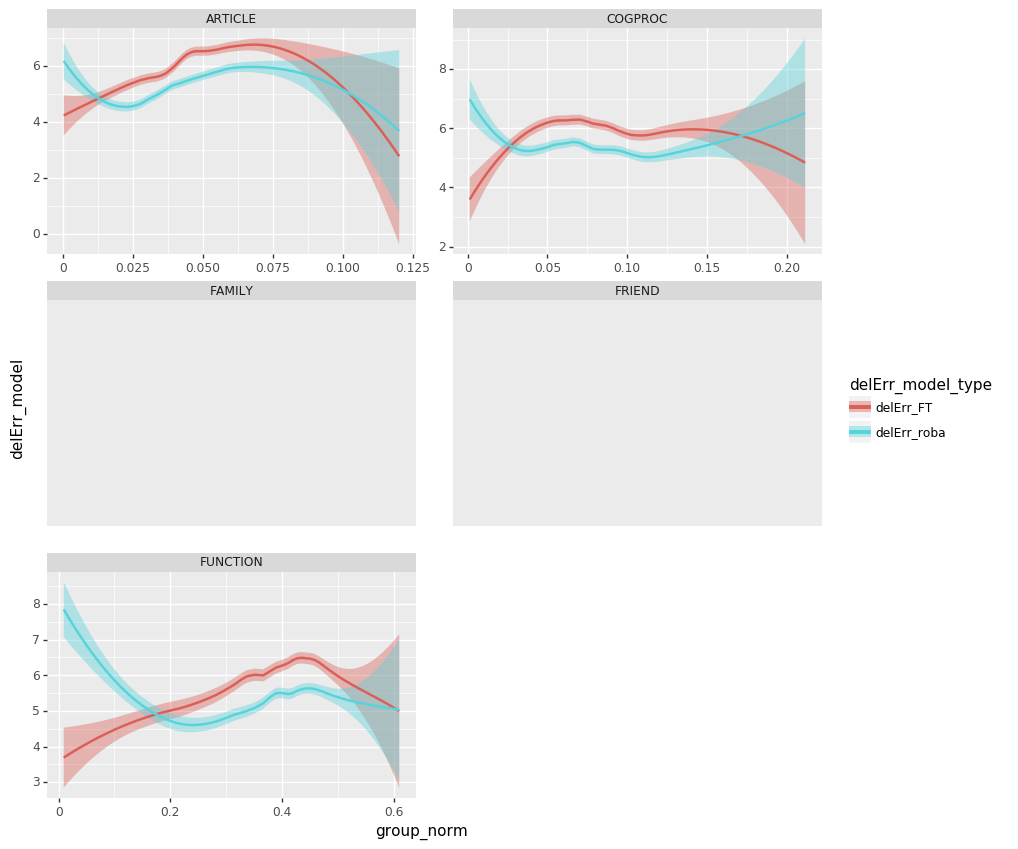

<ggplot: (8772161299106)>

In [86]:
df = delErr_age_liwc
df.loc[df.feat.isin(["FRIEND", "FAMILY"]), "group_norm"] = np.log(df[df.feat.isin(["FRIEND", "FAMILY"])].group_norm)
(
    ggplot(df, aes(y = "delErr_model", x = "group_norm", color="delErr_model_type", fill="delErr_model_type")) 
    + geom_smooth(span=0.6, show_legend=True, method="loess", size=1, method_args={'degree':2})
    + facet_wrap("feat", scales="free", ncol=2)
    + theme(subplots_adjust={'wspace': 0.1, 'hspace': 0.2}, figure_size=(10, 10))
)

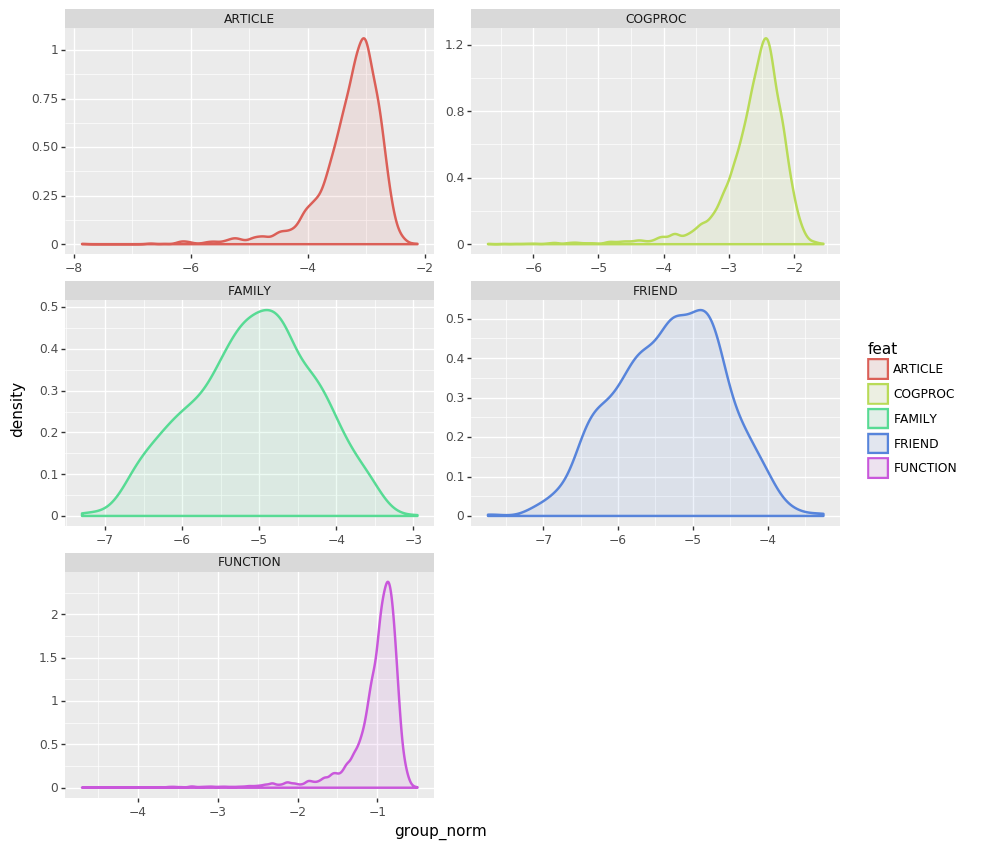

<ggplot: (-9223363264697451509)>

In [75]:

(
    ggplot(df.drop_duplicates(["feat", "group_norm"]), aes(x = "group_norm", color="feat", fill="feat")) 
    + geom_density(show_legend=True, size=1, alpha=0.1, stat="density")
    + facet_wrap("feat", scales="free", ncol=2)
    + theme(subplots_adjust={'wspace': 0.1, 'hspace': 0.2}, figure_size=(10, 10))
)

# Age Pre tr and Dim Red

In [16]:
delErr_age_stats = pd.merge(delErr_age, user_stats, on="user_id")
delErr_age_stats

,user_id,feat_x,age,del_rpca,del_nmf,del_roba,del_rpca_roba_abs,del_nmf_roba_abs,del_rpca_nmf_abs,feat_y,value,group_norm
0,507427,age_N500_bs5,23,5.006242,4.557411,2.843383,2.162858,1.714027,0.448831,_avg1gramLength,4,4.021986
1,507427,age_N500_bs5,23,5.006242,4.557411,2.843383,2.162858,1.714027,0.448831,_avg1gramsPerMsg,13,13.177570
2,507427,age_N500_bs5,23,5.006242,4.557411,2.843383,2.162858,1.714027,0.448831,_total1grams,1410,1410.000000
3,507427,age_N500_bs1,23,4.675235,4.875130,3.468992,1.206243,1.406138,-0.199895,_avg1gramLength,4,4.021986
4,507427,age_N500_bs1,23,4.675235,4.875130,3.468992,1.206243,1.406138,-0.199895,_avg1gramsPerMsg,13,13.177570
...,...,...,...,...,...,...,...,...,...,...,...,...
164896,100002405455866,age_N500_bs2,21,5.818908,5.204625,5.336584,0.482323,-0.131959,0.614283,_avg1gramsPerMsg,32,31.667732
164897,100002405455866,age_N500_bs2,21,5.818908,5.204625,5.336584,0.482323,-0.131959,0.614283,_total1grams,9912,9912.000000
164898,100002405455866,age_N500_bs9,21,6.284949,6.292907,6.793257,-0.508307,-0.500350,-0.007958,_avg1gramLength,4,4.154056
164899,100002405455866,age_N500_bs9,21,6.284949,6.292907,6.793257,-0.508307,-0.500350,-0.007958,_avg1gramsPerMsg,32,31.667732


In [17]:
bootstrap_metrics = []
for feat in delErr_age_stats.feat_x.unique():
    temp = delErr_age_stats[delErr_age_stats.feat_x == feat]
    mae_rpca = np.around(np.mean(temp.del_rpca.values), 3)
    mae_nmf = np.around(np.mean(temp.del_nmf.values), 3)
    mae_roba = np.around(np.mean(temp.del_roba.values), 3)
    bootstrap_metrics.append([feat, mae_rpca, mae_nmf, mae_roba])

bootstrap_metrics = pd.DataFrame(bootstrap_metrics, columns=["feat", "mae_rpca", "mae_nmf", "mae_roba"])

In [18]:
bootstrap_metrics.sort_values(["mae_rpca"], ascending=True)

,feat,mae_rpca,mae_nmf,mae_roba
3,age,4.088,4.124,3.829
2,age_N500_bs0,4.351,4.469,4.312
9,age_N500_bs2,4.366,4.418,4.293
7,age_N500_bs6,4.380,4.498,4.356
8,age_N500_bs8,4.415,4.499,4.362
0,age_N500_bs5,4.419,4.512,4.334
1,age_N500_bs1,4.448,4.850,4.359
5,age_N500_bs4,4.455,4.588,4.441
4,age_N500_bs7,4.500,4.592,4.455
10,age_N500_bs9,4.562,4.618,4.359


In [19]:
bootstrap_metrics.sort_values(["mae_roba"], ascending=True)

,feat,mae_rpca,mae_nmf,mae_roba
3,age,4.088,4.124,3.829
9,age_N500_bs2,4.366,4.418,4.293
2,age_N500_bs0,4.351,4.469,4.312
6,age_N500_bs3,4.574,4.652,4.319
0,age_N500_bs5,4.419,4.512,4.334
7,age_N500_bs6,4.380,4.498,4.356
1,age_N500_bs1,4.448,4.850,4.359
10,age_N500_bs9,4.562,4.618,4.359
8,age_N500_bs8,4.415,4.499,4.362
5,age_N500_bs4,4.455,4.588,4.441


In [20]:
bs_metrics = pd.concat([bootstrap_metrics, bootstrap_metrics.mae_roba - bootstrap_metrics.mae_rpca, bootstrap_metrics.mae_rpca - bootstrap_metrics.mae_nmf], axis=1)
bs_metrics.columns = ['feat', 'mae_rpca', 'mae_nmf', 'mae_roba', "roba_rpca", "rpca_nmf"]
bs_metrics

,feat,mae_rpca,mae_nmf,mae_roba,roba_rpca,rpca_nmf
0,age_N500_bs5,4.419,4.512,4.334,-0.085,-0.093
1,age_N500_bs1,4.448,4.850,4.359,-0.089,-0.402
2,age_N500_bs0,4.351,4.469,4.312,-0.039,-0.118
3,age,4.088,4.124,3.829,-0.259,-0.036
4,age_N500_bs7,4.500,4.592,4.455,-0.045,-0.092
5,age_N500_bs4,4.455,4.588,4.441,-0.014,-0.133
6,age_N500_bs3,4.574,4.652,4.319,-0.255,-0.078
7,age_N500_bs6,4.380,4.498,4.356,-0.024,-0.118
8,age_N500_bs8,4.415,4.499,4.362,-0.053,-0.084
9,age_N500_bs2,4.366,4.418,4.293,-0.073,-0.052


In [21]:
feats_comp = ["age_N500_bs1", "age_N500_bs4"]
bs_metrics.sort_values(["roba_rpca", "rpca_nmf"], ascending=False)

,feat,mae_rpca,mae_nmf,mae_roba,roba_rpca,rpca_nmf
5,age_N500_bs4,4.455,4.588,4.441,-0.014,-0.133
7,age_N500_bs6,4.380,4.498,4.356,-0.024,-0.118
2,age_N500_bs0,4.351,4.469,4.312,-0.039,-0.118
4,age_N500_bs7,4.500,4.592,4.455,-0.045,-0.092
8,age_N500_bs8,4.415,4.499,4.362,-0.053,-0.084
9,age_N500_bs2,4.366,4.418,4.293,-0.073,-0.052
0,age_N500_bs5,4.419,4.512,4.334,-0.085,-0.093
1,age_N500_bs1,4.448,4.850,4.359,-0.089,-0.402
10,age_N500_bs9,4.562,4.618,4.359,-0.203,-0.056
6,age_N500_bs3,4.574,4.652,4.319,-0.255,-0.078


In [22]:
results_2 = delErr_age_stats[delErr_age_stats.feat_x == "age_N500_bs1"][["user_id", "del_rpca_roba_abs", "del_rpca_nmf_abs", "del_nmf_roba_abs", "feat_y", "group_norm"]]
results_2

,user_id,del_rpca_roba_abs,del_rpca_nmf_abs,del_nmf_roba_abs,feat_y,group_norm
3,507427,1.206243,-0.199895,1.406138,_avg1gramLength,4.021986
4,507427,1.206243,-0.199895,1.406138,_avg1gramsPerMsg,13.177570
5,507427,1.206243,-0.199895,1.406138,_total1grams,1410.000000
36,1237298,2.696460,0.606925,2.089535,_avg1gramLength,1.997390
37,1237298,2.696460,0.606925,2.089535,_avg1gramsPerMsg,38.660550
...,...,...,...,...,...,...
164839,100002308438946,1.147478,-0.352644,1.500122,_avg1gramsPerMsg,42.293578
164840,100002308438946,1.147478,-0.352644,1.500122,_total1grams,4610.000000
164871,100002405455866,0.290812,1.620900,-1.330088,_avg1gramLength,4.154056
164872,100002405455866,0.290812,1.620900,-1.330088,_avg1gramsPerMsg,31.667732


In [23]:
results_2.loc[results_2.feat_y == "_total1grams", "group_norm"] = np.log(results_2[results_2.feat_y == "_total1grams"]["group_norm"]) 

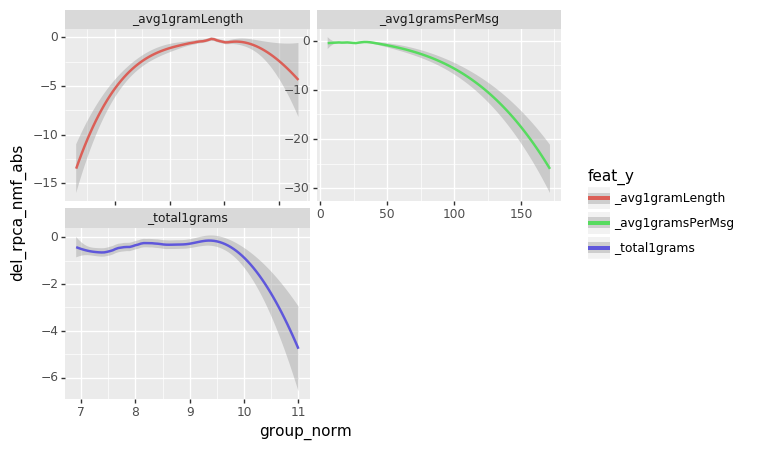

<ggplot: (-9223363276116029531)>

In [24]:
#df = results_2[results_2.feat_y == "_total1grams"]
#df = results_2[results_2.feat_y == "_avg1gramsPerMsg"]
#df = results_2[results_2.feat_y == "_avg1gramLength"]

(   ggplot(results_2, aes(x="group_norm", y='del_rpca_nmf_abs', color="feat_y" ))
    + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
    + facet_wrap("feat_y", ncol=2, scales="free")
)

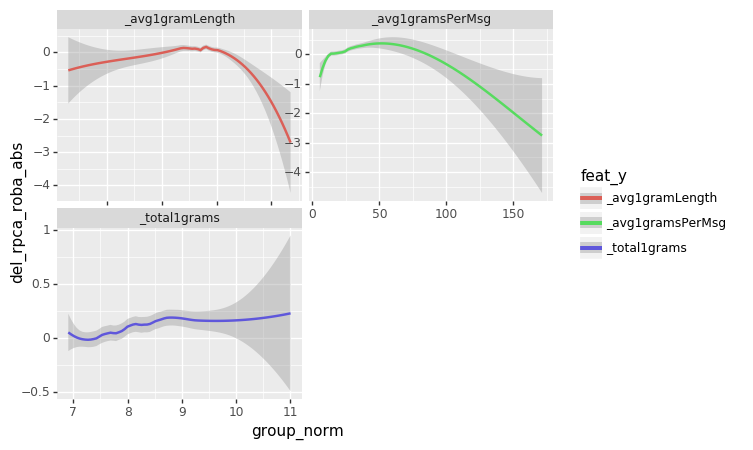

<ggplot: (-9223363276115072610)>

In [25]:
(   ggplot(results_2, aes(x="group_norm", y='del_rpca_roba_abs', color="feat_y" ))
    + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
    + facet_wrap("feat_y", ncol=2, scales="free")
)

In [26]:
delErr_age_stats

,user_id,feat_x,age,del_rpca,del_nmf,del_roba,del_rpca_roba_abs,del_nmf_roba_abs,del_rpca_nmf_abs,feat_y,value,group_norm
0,507427,age_N500_bs5,23,5.006242,4.557411,2.843383,2.162858,1.714027,0.448831,_avg1gramLength,4,4.021986
1,507427,age_N500_bs5,23,5.006242,4.557411,2.843383,2.162858,1.714027,0.448831,_avg1gramsPerMsg,13,13.177570
2,507427,age_N500_bs5,23,5.006242,4.557411,2.843383,2.162858,1.714027,0.448831,_total1grams,1410,1410.000000
3,507427,age_N500_bs1,23,4.675235,4.875130,3.468992,1.206243,1.406138,-0.199895,_avg1gramLength,4,4.021986
4,507427,age_N500_bs1,23,4.675235,4.875130,3.468992,1.206243,1.406138,-0.199895,_avg1gramsPerMsg,13,13.177570
...,...,...,...,...,...,...,...,...,...,...,...,...
164896,100002405455866,age_N500_bs2,21,5.818908,5.204625,5.336584,0.482323,-0.131959,0.614283,_avg1gramsPerMsg,32,31.667732
164897,100002405455866,age_N500_bs2,21,5.818908,5.204625,5.336584,0.482323,-0.131959,0.614283,_total1grams,9912,9912.000000
164898,100002405455866,age_N500_bs9,21,6.284949,6.292907,6.793257,-0.508307,-0.500350,-0.007958,_avg1gramLength,4,4.154056
164899,100002405455866,age_N500_bs9,21,6.284949,6.292907,6.793257,-0.508307,-0.500350,-0.007958,_avg1gramsPerMsg,32,31.667732


In [36]:
delErr_age_y = delErr_age_stats[["user_id", "age", "feat_y", "group_norm"]].drop_duplicates().reset_index(drop=True)

In [37]:
delErr_age_p9_uni = []
for i in ["del_rpca", "del_nmf", "del_roba"]:
    temp = delErr_age_y
    temp = pd.merge(temp, delErr_age_stats[["user_id", "feat_x", f"{i}"]], on="user_id")
    temp = temp.rename(columns = {f"{i}":"delErr_model"})
    temp["delErr_model_type"] = i
    delErr_age_p9_uni.append(temp)
delErr_age_p9_uni = pd.concat(delErr_age_p9_uni, axis=0)
delErr_age_p9_uni.head()

,user_id,age,feat_y,group_norm,feat_x,delErr_model,delErr_model_type
0,507427,23,_avg1gramLength,4.021986,age_N500_bs5,5.006242,del_rpca
1,507427,23,_avg1gramLength,4.021986,age_N500_bs5,5.006242,del_rpca
2,507427,23,_avg1gramLength,4.021986,age_N500_bs5,5.006242,del_rpca
3,507427,23,_avg1gramLength,4.021986,age_N500_bs1,4.675235,del_rpca
4,507427,23,_avg1gramLength,4.021986,age_N500_bs1,4.675235,del_rpca


In [38]:
delErr_age_p9_multi = []
for i in ["del_rpca_roba_abs", "del_nmf_roba_abs", "del_rpca_nmf_abs"]:
    temp = delErr_age_y
    temp = pd.merge(temp, delErr_age_stats[["user_id", "feat_x", f"{i}"]], on="user_id")
    temp = temp.rename(columns = {f"{i}":"delErr_model"})
    temp["delErr_model_type"] = i
    delErr_age_p9_multi.append(temp)
delErr_age_p9_multi = pd.concat(delErr_age_p9_multi, axis=0)
delErr_age_p9_multi.head()

,user_id,age,feat_y,group_norm,feat_x,delErr_model,delErr_model_type
0,507427,23,_avg1gramLength,4.021986,age_N500_bs5,2.162858,del_rpca_roba_abs
1,507427,23,_avg1gramLength,4.021986,age_N500_bs5,2.162858,del_rpca_roba_abs
2,507427,23,_avg1gramLength,4.021986,age_N500_bs5,2.162858,del_rpca_roba_abs
3,507427,23,_avg1gramLength,4.021986,age_N500_bs1,1.206243,del_rpca_roba_abs
4,507427,23,_avg1gramLength,4.021986,age_N500_bs1,1.206243,del_rpca_roba_abs


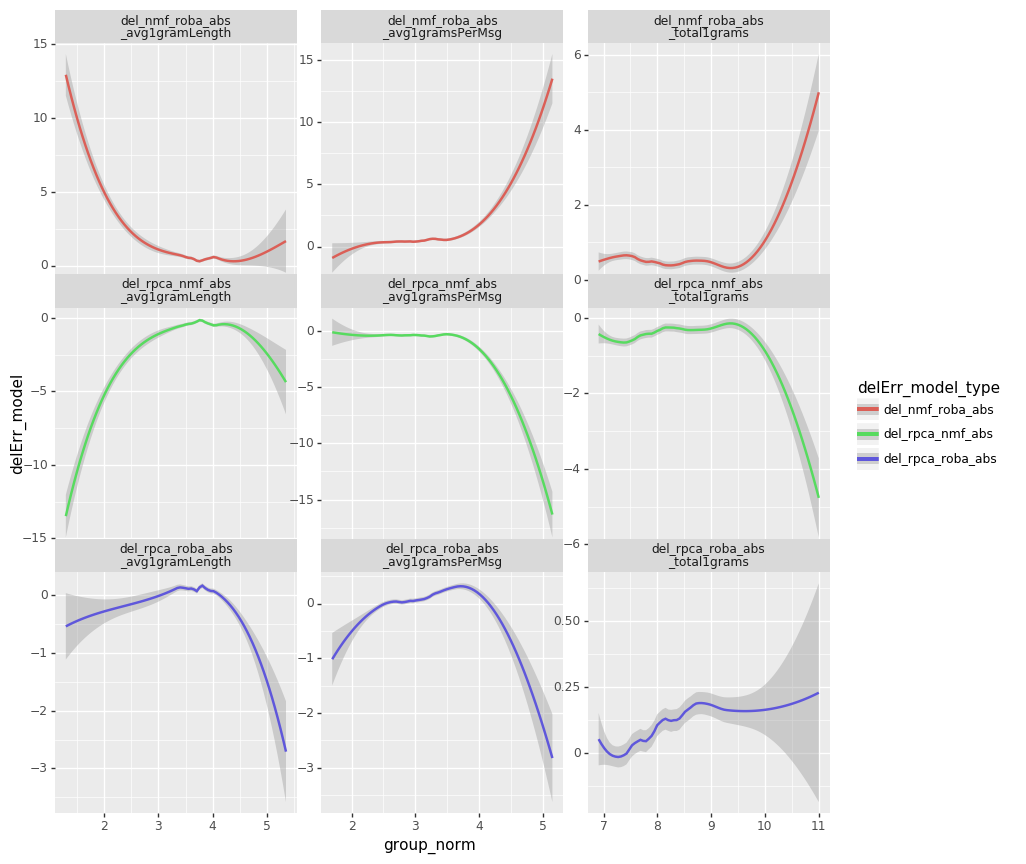

<ggplot: (-9223363276114439245)>

In [30]:
df = delErr_age_p9_multi
df, x = df[df.feat_x == "age_N500_bs1"], "delErr_model"
df.loc[df.feat_y == "_total1grams", "group_norm"] = np.log(df[df.feat_y == "_total1grams"]["group_norm"])
df.loc[df.feat_y == "_avg1gramsPerMsg", "group_norm"] = np.log(df[df.feat_y == "_avg1gramsPerMsg"]["group_norm"])

(
    ggplot(df, aes(y = "delErr_model", x = "group_norm", color="delErr_model_type")) 
    + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
    + facet_wrap("~ delErr_model_type + feat_y", scales="free")
    + theme(subplots_adjust={'wspace': 0.1, 'hspace': 0.1}, figure_size=(10, 10))
)

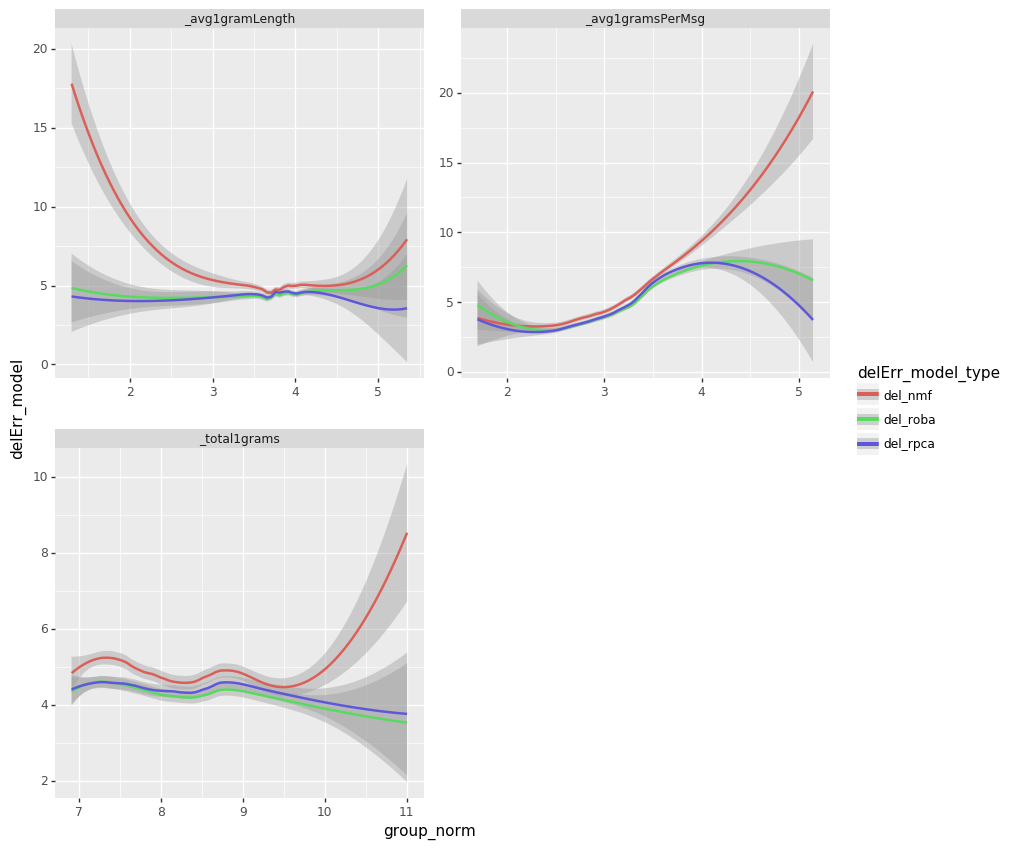

<ggplot: (-9223363252735759777)>

In [83]:
df = delErr_age_p9_uni
df, x = df[df.feat_x == "age_N500_bs1"], "delErr_model"
df.loc[df.feat_y == "_total1grams", "group_norm"] = np.log(df[df.feat_y == "_total1grams"]["group_norm"])
df.loc[df.feat_y == "_avg1gramsPerMsg", "group_norm"] = np.log(df[df.feat_y == "_avg1gramsPerMsg"]["group_norm"])

(
    ggplot(df, aes(y = "delErr_model", x = "group_norm", color="delErr_model_type")) 
    + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
    + facet_wrap("feat_y", scales="free", ncol=2)
    + theme(subplots_adjust={'wspace': 0.1, 'hspace': 0.2}, figure_size=(10, 10))
)

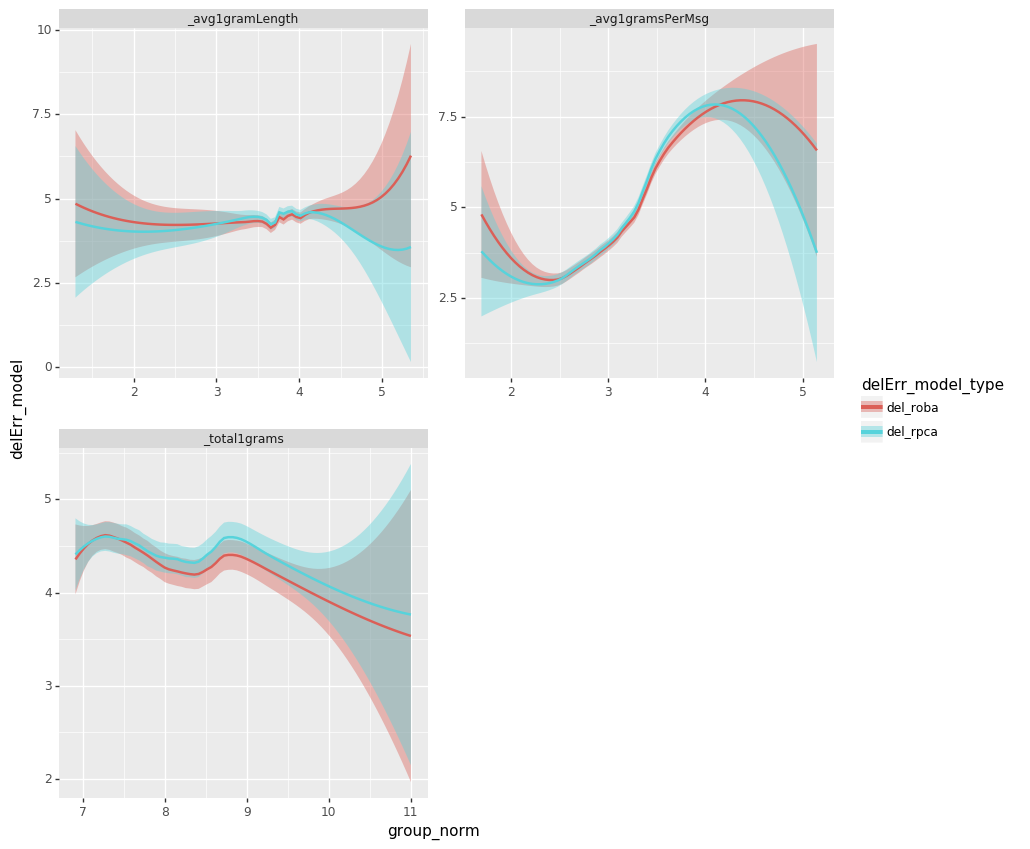

<ggplot: (-9223363252742011988)>

In [86]:
df = delErr_age_p9_uni
df, x = df[df.feat_x == "age_N500_bs1"], "delErr_model"
df.loc[df.feat_y == "_total1grams", "group_norm"] = np.log(df[df.feat_y == "_total1grams"]["group_norm"])
df.loc[df.feat_y == "_avg1gramsPerMsg", "group_norm"] = np.log(df[df.feat_y == "_avg1gramsPerMsg"]["group_norm"])
df = df[df.delErr_model_type != "del_nmf"]

(
    ggplot(df, aes(y = "delErr_model", x = "group_norm", color="delErr_model_type", fill="delErr_model_type")) 
    + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
    + facet_wrap("feat_y", scales="free", ncol=2)
    + theme(subplots_adjust={'wspace': 0.1, 'hspace': 0.2}, figure_size=(10, 10))
)

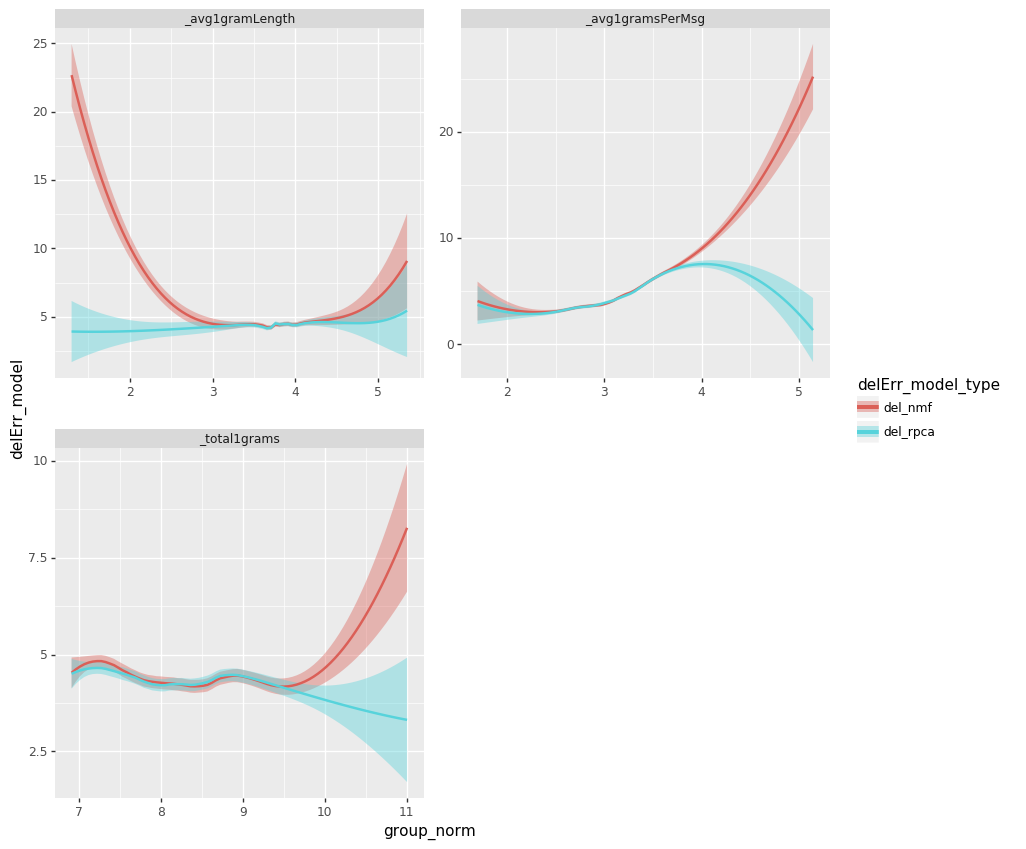

<ggplot: (8760739513864)>

In [31]:
df = delErr_age_p9_uni
df, x = df[df.feat_x == "age_N500_bs2"], "delErr_model"
df.loc[df.feat_y == "_total1grams", "group_norm"] = np.log(df[df.feat_y == "_total1grams"]["group_norm"])
df.loc[df.feat_y == "_avg1gramsPerMsg", "group_norm"] = np.log(df[df.feat_y == "_avg1gramsPerMsg"]["group_norm"])
df = df[df.delErr_model_type != "del_roba"]

(
    ggplot(df, aes(y = "delErr_model", x = "group_norm", color="delErr_model_type", fill="delErr_model_type")) 
    + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
    + facet_wrap("feat_y", scales="free", ncol=2)
    + theme(subplots_adjust={'wspace': 0.1, 'hspace': 0.2}, figure_size=(10, 10))
)

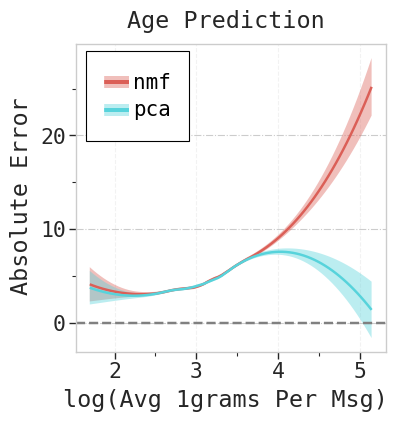

<ggplot: (8760717567983)>

In [78]:
#df, x, facet = result_1[result_1.feat == "log(_total1grams)"], "group_norm", "delErr_type"

df = delErr_age_p9_uni
df, x = df[df.feat_x == "age_N500_bs2"], "delErr_model"
df.loc[df.feat_y == "_total1grams", "group_norm"] = np.log(df[df.feat_y == "_total1grams"]["group_norm"])
df.loc[df.feat_y == "_avg1gramsPerMsg", "group_norm"] = np.log(df[df.feat_y == "_avg1gramsPerMsg"]["group_norm"])
df = df[df.feat_y == "_avg1gramsPerMsg"]
df = df[df.delErr_model_type != "del_roba"]
df.loc[df.delErr_model_type == "del_nmf", "delErr_model_type"] = "nmf"
df.loc[df.delErr_model_type == "del_rpca", "delErr_model_type"] = "pca"

def plotter(df, x, y, title=None, facet=None):
    plot = (ggplot(df, aes(x=f'{x}', y=f'{y}', color=f"{facet}", fill=f"{facet}"))
        + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
        + labs(x="log(Avg 1grams Per Msg)", y="Absolute Error")
        + theme_seaborn(style="whitegrid", context="paper", font_scale=1.75, font="monospace")
        + geom_hline(yintercept = 0, color='gray', size=1, linetype="dashed")
        + theme(subplots_adjust={'wspace': 0.05}, figure_size=(4, 4), legend_title=element_blank(), panel_grid_major_x=element_line(linetype='dashed', alpha=0.25), panel_grid_major_y=element_line(linetype='dashdot',), legend_position=(.28, .75), legend_direction='vertical', legend_box_margin=0.05, legend_background=element_rect(fill='white'),legend_text=element_text(size=15))
        + ggtitle("Age Prediction")
        
        #+ scale_y_continuous(breaks = range(-1,12,2))
        )
    #if facet is not None: plot = plot + facet_wrap(f"{facet}", ncol=2, scales="fixed") 
    if title is not None: plot = plot + ggtitle(f"{title}")
    return plot


plot = plotter(df, "group_norm", "delErr_model", facet="delErr_model_type") 
#plot.save(filename="./ErrorAnalysis/RPCA_NMFdeltaErrorAvg1gramsPerMsg_age.pdf", format="pdf", dpi=250)
plot

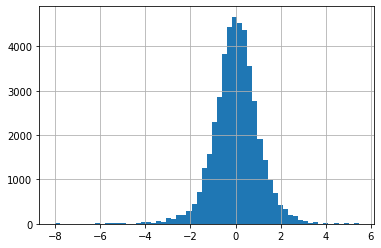

In [80]:
delErr_age_p9_multi[(delErr_age_p9_multi.feat_x == "age_N500_bs4")&(delErr_age_p9_multi.delErr_model_type=="del_rpca_roba_abs")].delErr_model.hist(bins=60)

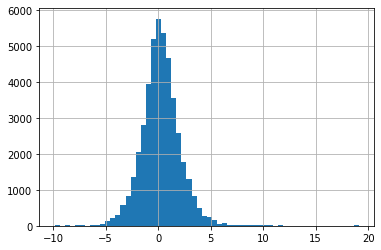

In [81]:
delErr_age_p9_multi[(delErr_age_p9_multi.feat_x == "age_N500_bs3")&(delErr_age_p9_multi.delErr_model_type=="del_rpca_roba_abs")].delErr_model.hist(bins=60)

# EXT

In [82]:
delErr_ext_stats = pd.merge(delErr_ext, user_stats, on="user_id")
delErr_ext_stats

,user_id,feat_x,ext,del_rpca,del_nmf,del_roba,del_rpca_roba_abs,del_nmf_roba_abs,del_rpca_nmf_abs,feat_y,value,group_norm
0,507427,ext_N500_bs5,-0.64,0.557597,0.520212,0.452456,0.105141,0.067755,0.037386,_avg1gramLength,4,4.021986
1,507427,ext_N500_bs5,-0.64,0.557597,0.520212,0.452456,0.105141,0.067755,0.037386,_avg1gramsPerMsg,13,13.177570
2,507427,ext_N500_bs5,-0.64,0.557597,0.520212,0.452456,0.105141,0.067755,0.037386,_total1grams,1410,1410.000000
3,507427,ext_N500_bs7,-0.64,0.128268,0.338376,0.148213,-0.019945,0.190163,-0.210108,_avg1gramLength,4,4.021986
4,507427,ext_N500_bs7,-0.64,0.128268,0.338376,0.148213,-0.019945,0.190163,-0.210108,_avg1gramsPerMsg,13,13.177570
...,...,...,...,...,...,...,...,...,...,...,...,...
164896,100002405455866,ext_N500_bs2,-1.21,1.263845,1.245309,1.150943,0.112902,0.094366,0.018536,_avg1gramsPerMsg,32,31.667732
164897,100002405455866,ext_N500_bs2,-1.21,1.263845,1.245309,1.150943,0.112902,0.094366,0.018536,_total1grams,9912,9912.000000
164898,100002405455866,ext_N500_bs9,-1.21,0.864826,1.064438,0.905852,-0.041026,0.158586,-0.199612,_avg1gramLength,4,4.154056
164899,100002405455866,ext_N500_bs9,-1.21,0.864826,1.064438,0.905852,-0.041026,0.158586,-0.199612,_avg1gramsPerMsg,32,31.667732


In [83]:
bootstrap_metrics = []
for feat in delErr_ext_stats.feat_x.unique():
    temp = delErr_ext_stats[delErr_ext_stats.feat_x == feat]
    mae_rpca = np.around(np.mean(temp.del_rpca.values), 3)
    mae_nmf = np.around(np.mean(temp.del_nmf.values), 3)
    mae_roba = np.around(np.mean(temp.del_roba.values), 3)
    bootstrap_metrics.append([feat, mae_rpca, mae_nmf, mae_roba])

bootstrap_metrics = pd.DataFrame(bootstrap_metrics, columns=["feat", "mae_rpca", "mae_nmf", "mae_roba"])

In [84]:
bs_metrics = pd.concat([bootstrap_metrics, bootstrap_metrics.mae_roba - bootstrap_metrics.mae_rpca, bootstrap_metrics.mae_rpca - bootstrap_metrics.mae_nmf], axis=1)
bs_metrics.columns = ['feat', 'mae_rpca', 'mae_nmf', 'mae_roba', "roba_rpca", "rpca_nmf"]
bs_metrics

,feat,mae_rpca,mae_nmf,mae_roba,roba_rpca,rpca_nmf
0,ext_N500_bs5,0.810,0.829,0.819,0.009,-0.019
1,ext_N500_bs7,0.827,0.837,0.833,0.006,-0.010
2,ext_N500_bs3,0.812,0.827,0.819,0.007,-0.015
3,ext_N500_bs1,0.825,0.851,0.828,0.003,-0.026
4,ext_N500_bs6,0.846,0.854,0.848,0.002,-0.008
5,ext_N500_bs8,0.831,0.835,0.825,-0.006,-0.004
6,ext_N500_bs0,0.832,0.845,0.835,0.003,-0.013
7,ext,0.790,0.792,0.790,0.000,-0.002
8,ext_N500_bs4,0.815,0.832,0.820,0.005,-0.017
9,ext_N500_bs2,0.832,0.848,0.840,0.008,-0.016


In [85]:
bs_metrics.sort_values(["roba_rpca"], ascending=True)

,feat,mae_rpca,mae_nmf,mae_roba,roba_rpca,rpca_nmf
5,ext_N500_bs8,0.831,0.835,0.825,-0.006,-0.004
7,ext,0.790,0.792,0.790,0.000,-0.002
4,ext_N500_bs6,0.846,0.854,0.848,0.002,-0.008
10,ext_N500_bs9,0.827,0.832,0.829,0.002,-0.005
3,ext_N500_bs1,0.825,0.851,0.828,0.003,-0.026
6,ext_N500_bs0,0.832,0.845,0.835,0.003,-0.013
8,ext_N500_bs4,0.815,0.832,0.820,0.005,-0.017
1,ext_N500_bs7,0.827,0.837,0.833,0.006,-0.010
2,ext_N500_bs3,0.812,0.827,0.819,0.007,-0.015
9,ext_N500_bs2,0.832,0.848,0.840,0.008,-0.016


In [86]:
delErr_ext_y = delErr_ext_stats[["user_id", "ext", "feat_y", "group_norm"]].drop_duplicates().reset_index(drop=True)

In [87]:
delErr_ext_p9_uni = []
for i in ["del_rpca", "del_nmf", "del_roba"]:
    temp = delErr_ext_y
    temp = pd.merge(temp, delErr_ext_stats[["user_id", "feat_x", f"{i}"]], on="user_id")
    temp = temp.rename(columns = {f"{i}":"delErr_model"})
    temp["delErr_model_type"] = i
    delErr_ext_p9_uni.append(temp)
delErr_ext_p9_uni = pd.concat(delErr_ext_p9_uni, axis=0)
delErr_ext_p9_uni.head()

,user_id,ext,feat_y,group_norm,feat_x,delErr_model,delErr_model_type
0,507427,-0.64,_avg1gramLength,4.021986,ext_N500_bs5,0.557597,del_rpca
1,507427,-0.64,_avg1gramLength,4.021986,ext_N500_bs5,0.557597,del_rpca
2,507427,-0.64,_avg1gramLength,4.021986,ext_N500_bs5,0.557597,del_rpca
3,507427,-0.64,_avg1gramLength,4.021986,ext_N500_bs7,0.128268,del_rpca
4,507427,-0.64,_avg1gramLength,4.021986,ext_N500_bs7,0.128268,del_rpca


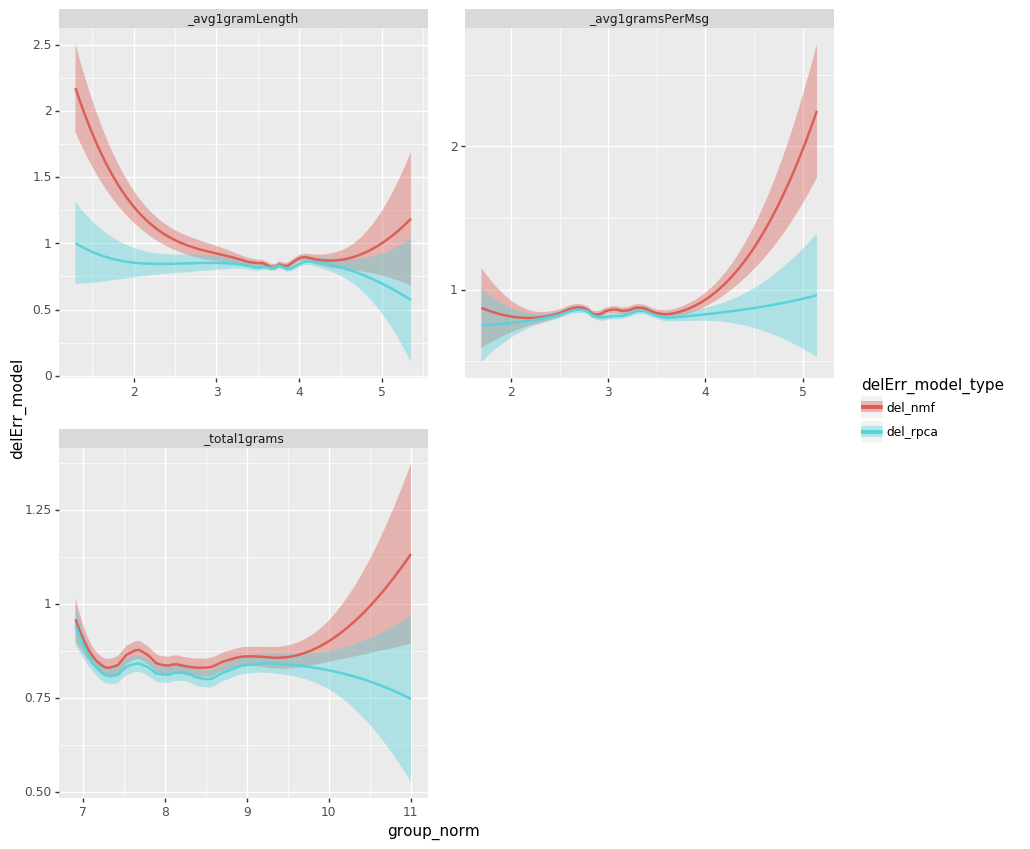

<ggplot: (-9223363252741495741)>

In [105]:
df = delErr_ext_p9_uni
df, x = df[df.feat_x == "ext_N500_bs1"], "delErr_model"
df.loc[df.feat_y == "_total1grams", "group_norm"] = np.log(df[df.feat_y == "_total1grams"]["group_norm"])
df.loc[df.feat_y == "_avg1gramsPerMsg", "group_norm"] = np.log(df[df.feat_y == "_avg1gramsPerMsg"]["group_norm"])
df = df[df.delErr_model_type != "del_roba"]

(
    ggplot(df, aes(y = "delErr_model", x = "group_norm", color="delErr_model_type", fill="delErr_model_type")) 
    + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
    + facet_wrap("feat_y", scales="free", ncol=2)
    + theme(subplots_adjust={'wspace': 0.1, 'hspace': 0.2}, figure_size=(10, 10))
)

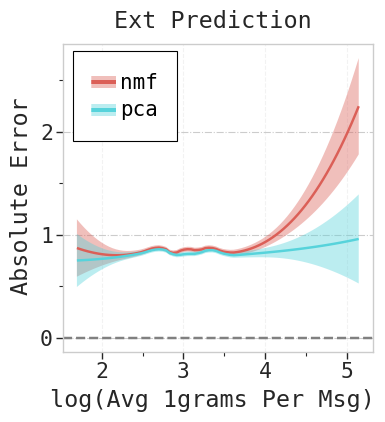

<ggplot: (-9223363276133647286)>

In [95]:
df = delErr_ext_p9_uni
df, x = df[df.feat_x == "ext_N500_bs1"], "delErr_model"
df.loc[df.feat_y == "_total1grams", "group_norm"] = np.log(df[df.feat_y == "_total1grams"]["group_norm"])
df.loc[df.feat_y == "_avg1gramsPerMsg", "group_norm"] = np.log(df[df.feat_y == "_avg1gramsPerMsg"]["group_norm"])
df = df[df.feat_y == "_avg1gramsPerMsg"]
df = df[df.delErr_model_type != "del_roba"]
df.loc[df.delErr_model_type == "del_nmf", "delErr_model_type"] = "nmf"
df.loc[df.delErr_model_type == "del_rpca", "delErr_model_type"] = "pca"

def plotter(df, x, y, title=None, facet=None):
    plot = (ggplot(df, aes(x=f'{x}', y=f'{y}', color=f"{facet}", fill=f"{facet}"))
        + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
        + labs(x="log(Avg 1grams Per Msg)", y="Absolute Error")
        + theme_seaborn(style="whitegrid", context="paper", font_scale=1.75, font="monospace")
        + geom_hline(yintercept = 0, color='gray', size=1, linetype="dashed")
        + theme(subplots_adjust={'wspace': 0.05}, figure_size=(4, 4), legend_title=element_blank(), panel_grid_major_x=element_line(linetype='dashed', alpha=0.25), panel_grid_major_y=element_line(linetype='dashdot',), legend_position=(.28, .75), legend_direction='vertical', legend_box_margin=0.05, legend_background=element_rect(fill='white'),legend_text=element_text(size=15))
        + ggtitle("Ext Prediction")
        
        #+ scale_y_continuous(breaks = range(-1,12,2))
        )
    #if facet is not None: plot = plot + facet_wrap(f"{facet}", ncol=2, scales="fixed") 
    if title is not None: plot = plot + ggtitle(f"{title}")
    return plot


plot = plotter(df, "group_norm", "delErr_model", facet="delErr_model_type") 
plot.save(filename="./ErrorAnalysis/RPCA_NMFdeltaErrorAvg1gramsPerMsg_Ext.pdf", format="pdf", dpi=250)
plot

# OPE

In [135]:
delErr_ope_stats = pd.merge(delErr_ope, user_stats, on="user_id")
delErr_ope_stats

,user_id,feat_x,ope,del_rpca,del_nmf,del_roba,del_rpca_roba_abs,del_nmf_roba_abs,del_rpca_nmf_abs,feat_y,value,group_norm
0,507427,ope_N500_bs2,1.22,1.300672,1.201987,1.201942,0.098731,0.000046,0.098685,_avg1gramLength,4,4.021986
1,507427,ope_N500_bs2,1.22,1.300672,1.201987,1.201942,0.098731,0.000046,0.098685,_avg1gramsPerMsg,13,13.177570
2,507427,ope_N500_bs2,1.22,1.300672,1.201987,1.201942,0.098731,0.000046,0.098685,_total1grams,1410,1410.000000
3,507427,ope_N500_bs3,1.22,1.570252,1.432285,1.474015,0.096237,-0.041730,0.137967,_avg1gramLength,4,4.021986
4,507427,ope_N500_bs3,1.22,1.570252,1.432285,1.474015,0.096237,-0.041730,0.137967,_avg1gramsPerMsg,13,13.177570
...,...,...,...,...,...,...,...,...,...,...,...,...
164896,100002405455866,ope_N500_bs4,0.11,0.339756,0.257333,0.349379,-0.009622,-0.092046,0.082424,_avg1gramsPerMsg,32,31.667732
164897,100002405455866,ope_N500_bs4,0.11,0.339756,0.257333,0.349379,-0.009622,-0.092046,0.082424,_total1grams,9912,9912.000000
164898,100002405455866,ope_N500_bs9,0.11,0.263577,0.157074,0.282056,-0.018479,-0.124982,0.106503,_avg1gramLength,4,4.154056
164899,100002405455866,ope_N500_bs9,0.11,0.263577,0.157074,0.282056,-0.018479,-0.124982,0.106503,_avg1gramsPerMsg,32,31.667732


In [136]:
bootstrap_metrics = []
for feat in delErr_ope_stats.feat_x.unique():
    temp = delErr_ope_stats[delErr_ope_stats.feat_x == feat]
    mae_rpca = np.around(np.mean(temp.del_rpca.values), 3)
    mae_nmf = np.around(np.mean(temp.del_nmf.values), 3)
    mae_roba = np.around(np.mean(temp.del_roba.values), 3)
    bootstrap_metrics.append([feat, mae_rpca, mae_nmf, mae_roba])

bootstrap_metrics = pd.DataFrame(bootstrap_metrics, columns=["feat", "mae_rpca", "mae_nmf", "mae_roba"])

In [137]:
bs_metrics = pd.concat([bootstrap_metrics, bootstrap_metrics.mae_roba - bootstrap_metrics.mae_rpca, bootstrap_metrics.mae_rpca - bootstrap_metrics.mae_nmf], axis=1)
bs_metrics.columns = ['feat', 'mae_rpca', 'mae_nmf', 'mae_roba', "roba_rpca", "rpca_nmf"]
bs_metrics.sort_values(["roba_rpca"], ascending=True)

,feat,mae_rpca,mae_nmf,mae_roba,roba_rpca,rpca_nmf
5,ope_N500_bs7,0.726,0.722,0.716,-0.010,0.004
10,ope_N500_bs9,0.738,0.742,0.733,-0.005,-0.004
2,ope_N500_bs6,0.740,0.741,0.736,-0.004,-0.001
6,ope,0.690,0.690,0.686,-0.004,0.000
3,ope_N500_bs8,0.715,0.722,0.712,-0.003,-0.007
9,ope_N500_bs4,0.725,0.724,0.722,-0.003,0.001
8,ope_N500_bs5,0.707,0.715,0.707,0.000,-0.008
4,ope_N500_bs1,0.710,0.716,0.712,0.002,-0.006
0,ope_N500_bs2,0.707,0.722,0.711,0.004,-0.015
1,ope_N500_bs3,0.736,0.756,0.740,0.004,-0.020


In [138]:
delErr_ope_y = delErr_ope_stats[["user_id", "ope", "feat_y", "group_norm"]].drop_duplicates().reset_index(drop=True)
delErr_ope_p9_uni = []
for i in ["del_rpca", "del_nmf", "del_roba"]:
    temp = delErr_ope_y
    temp = pd.merge(temp, delErr_ope_stats[["user_id", "feat_x", f"{i}"]], on="user_id")
    temp = temp.rename(columns = {f"{i}":"delErr_model"})
    temp["delErr_model_type"] = i
    delErr_ope_p9_uni.append(temp)
delErr_ope_p9_uni = pd.concat(delErr_ope_p9_uni, axis=0)
delErr_ope_p9_uni.head()

,user_id,ope,feat_y,group_norm,feat_x,delErr_model,delErr_model_type
0,507427,1.22,_avg1gramLength,4.021986,ope_N500_bs2,1.300672,del_rpca
1,507427,1.22,_avg1gramLength,4.021986,ope_N500_bs2,1.300672,del_rpca
2,507427,1.22,_avg1gramLength,4.021986,ope_N500_bs2,1.300672,del_rpca
3,507427,1.22,_avg1gramLength,4.021986,ope_N500_bs3,1.570252,del_rpca
4,507427,1.22,_avg1gramLength,4.021986,ope_N500_bs3,1.570252,del_rpca


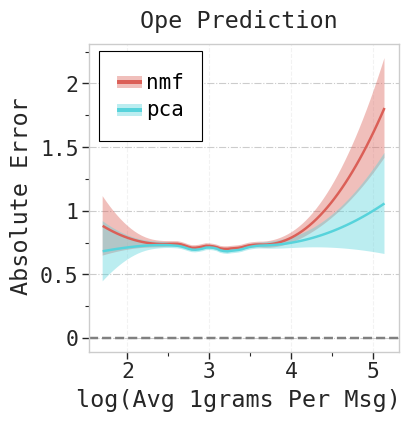

<ggplot: (-9223363264672928540)>

In [148]:
df = delErr_ope_p9_uni
df, x = df[df.feat_x == "ope_N500_bs2"], "delErr_model"
df.loc[df.feat_y == "_total1grams", "group_norm"] = np.log(df[df.feat_y == "_total1grams"]["group_norm"])
df.loc[df.feat_y == "_avg1gramsPerMsg", "group_norm"] = np.log(df[df.feat_y == "_avg1gramsPerMsg"]["group_norm"])
df = df[df.feat_y == "_avg1gramsPerMsg"]
df = df[df.delErr_model_type != "del_roba"]
df.loc[df.delErr_model_type == "del_nmf", "delErr_model_type"] = "nmf"
df.loc[df.delErr_model_type == "del_rpca", "delErr_model_type"] = "pca"

def plotter(df, x, y, title=None, facet=None):
    plot = (ggplot(df, aes(x=f'{x}', y=f'{y}', color=f"{facet}", fill=f"{facet}"))
        + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
        + labs(x="log(Avg 1grams Per Msg)", y="Absolute Error")
        + theme_seaborn(style="whitegrid", context="paper", font_scale=1.75, font="monospace")
        + geom_hline(yintercept = 0, color='gray', size=1, linetype="dashed")
        + theme(subplots_adjust={'wspace': 0.05}, figure_size=(4, 4), legend_title=element_blank(), panel_grid_major_x=element_line(linetype='dashed', alpha=0.25), panel_grid_major_y=element_line(linetype='dashdot',), legend_position=(.28, .75), legend_direction='vertical', legend_box_margin=0.05, legend_background=element_rect(fill='white'),legend_text=element_text(size=15))
        + ggtitle("Ope Prediction")
        
        #+ scale_y_continuous(breaks = range(-1,12,2))
        )
    #if facet is not None: plot = plot + facet_wrap(f"{facet}", ncol=2, scales="fixed") 
    if title is not None: plot = plot + ggtitle(f"{title}")
    return plot


plot = plotter(df, "group_norm", "delErr_model", facet="delErr_model_type") 
plot.save(filename="./ErrorAnalysis/RPCA_NMFdeltaErrorAvg1gramsPerMsg_Ope.pdf", format="pdf", dpi=250)
plot

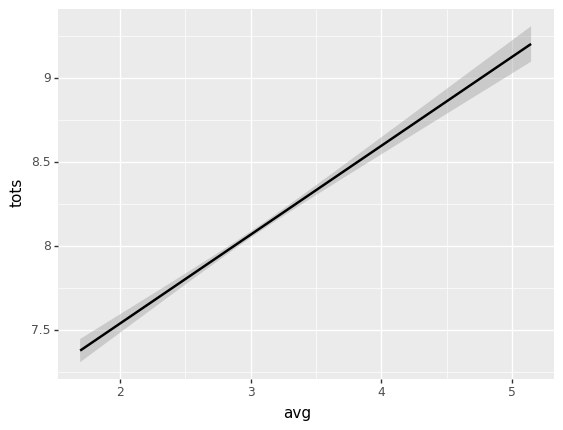

<ggplot: (8760701972793)>

In [131]:
temp = pd.concat([user_stats[user_stats.feat == "_avg1gramsPerMsg"].group_norm.reset_index(drop=True), user_stats[user_stats.feat == "_total1grams"].group_norm.reset_index(drop=True)], axis=1)
temp.columns = ["avg", "tots"]
temp["tots"] = np.log(temp["tots"])
temp["avg"] = np.log(temp["avg"])
(
    ggplot(temp, aes(x="avg", y="tots")) 
    + geom_smooth()
)

# BSAG

In [129]:
query_preds = f"SELECT A.group_id, A.feat, A.value, A.group_norm FROM feat$meta_1gram$T_18$clp18_id$16to16 A INNER JOIN 18_outcomes B ON A.group_id = B.clp18_id AND B.facet_fold=1"
user_stats_clp18 = conn.execute(query_preds).fetchall()
user_stats_clp18 = pd.DataFrame(user_stats_clp18, columns=["user_id", "feat", "value", "group_norm"])
user_stats_clp18

,user_id,feat,value,group_norm
0,clp187b977ec9,_avg1gramLength,4,3.791209
1,clp187b977ec9,_avg1gramsPerMsg,273,273.000000
2,clp187b977ec9,_total1grams,273,273.000000
3,clp187b977ec9,_totalMsgs,1,1.000000
4,clp181af5ec1f,_avg1gramLength,3,2.902564
...,...,...,...,...
3995,clp18e215f699,_totalMsgs,1,1.000000
3996,clp1851c9c3c2,_avg1gramLength,3,3.464286
3997,clp1851c9c3c2,_avg1gramsPerMsg,196,196.000000
3998,clp1851c9c3c2,_total1grams,196,196.000000


In [130]:
delErr_bsag_stats = pd.merge(delErr_bsag, user_stats_clp18, on="user_id")
delErr_bsag_stats

,user_id,feat_x,bsag,del_rpca,del_nmf,del_roba,del_rpca_roba_abs,del_nmf_roba_abs,del_rpca_nmf_abs,feat_y,value,group_norm
0,clp187b977ec9,a11_bsag_total_N500_bs4,12,2.609797,3.222646,2.589975,0.019822,0.632671,-0.612850,_avg1gramLength,4,3.791209
1,clp187b977ec9,a11_bsag_total_N500_bs4,12,2.609797,3.222646,2.589975,0.019822,0.632671,-0.612850,_avg1gramsPerMsg,273,273.000000
2,clp187b977ec9,a11_bsag_total_N500_bs4,12,2.609797,3.222646,2.589975,0.019822,0.632671,-0.612850,_total1grams,273,273.000000
3,clp187b977ec9,a11_bsag_total_N500_bs4,12,2.609797,3.222646,2.589975,0.019822,0.632671,-0.612850,_totalMsgs,1,1.000000
4,clp187b977ec9,a11_bsag_total_N500_bs0,12,3.396128,1.193257,7.607444,-4.211315,-6.414187,2.202872,_avg1gramLength,4,3.791209
...,...,...,...,...,...,...,...,...,...,...,...,...
43643,clp1851c9c3c2,a11_bsag_total_N500_bs1,6,1.374670,2.219753,1.100640,0.274030,1.119113,-0.845082,_totalMsgs,1,1.000000
43644,clp1851c9c3c2,a11_bsag_total_N500_bs6,6,2.785162,5.491325,0.142069,2.643093,5.349257,-2.706163,_avg1gramLength,3,3.464286
43645,clp1851c9c3c2,a11_bsag_total_N500_bs6,6,2.785162,5.491325,0.142069,2.643093,5.349257,-2.706163,_avg1gramsPerMsg,196,196.000000
43646,clp1851c9c3c2,a11_bsag_total_N500_bs6,6,2.785162,5.491325,0.142069,2.643093,5.349257,-2.706163,_total1grams,196,196.000000


In [131]:
bootstrap_metrics = []
for feat in delErr_bsag_stats.feat_x.unique():
    temp = delErr_bsag_stats[delErr_bsag_stats.feat_x == feat]
    mae_rpca = np.around(np.mean(temp.del_rpca.values), 3)
    mae_nmf = np.around(np.mean(temp.del_nmf.values), 3)
    mae_roba = np.around(np.mean(temp.del_roba.values), 3)
    bootstrap_metrics.append([feat, mae_rpca, mae_nmf, mae_roba])

bootstrap_metrics = pd.DataFrame(bootstrap_metrics, columns=["feat", "mae_rpca", "mae_nmf", "mae_roba"])

In [132]:
bs_metrics = pd.concat([bootstrap_metrics, bootstrap_metrics.mae_roba - bootstrap_metrics.mae_rpca, bootstrap_metrics.mae_rpca - bootstrap_metrics.mae_nmf], axis=1)
bs_metrics.columns = ['feat', 'mae_rpca', 'mae_nmf', 'mae_roba', "roba_rpca", "rpca_nmf"]
bs_metrics.sort_values(["roba_rpca"], ascending=True)

,feat,mae_rpca,mae_nmf,mae_roba,roba_rpca,rpca_nmf
3,a11_bsag_total_N500_bs3,6.204,5.958,5.974,-0.230,0.246
1,a11_bsag_total_N500_bs0,6.033,6.047,5.879,-0.154,-0.014
5,a11_bsag_total_N500_bs5,5.998,6.132,5.886,-0.112,-0.134
8,a11_bsag_total_N500_bs9,6.002,6.031,5.897,-0.105,-0.029
10,a11_bsag_total_N500_bs6,6.109,6.048,6.026,-0.083,0.061
2,a11_bsag_total_N500_bs7,6.171,6.067,6.089,-0.082,0.104
4,a11_bsag_total,5.858,5.826,5.850,-0.008,0.032
0,a11_bsag_total_N500_bs4,6.015,5.914,6.065,0.050,0.101
7,a11_bsag_total_N500_bs8,6.074,5.994,6.141,0.067,0.080
6,a11_bsag_total_N500_bs2,6.001,5.989,6.161,0.160,0.012


In [133]:
delErr_bsag_y = delErr_bsag_stats[["user_id", "bsag", "feat_y", "group_norm"]].drop_duplicates().reset_index(drop=True)
delErr_bsag_p9_uni = []
for i in ["del_rpca", "del_nmf", "del_roba"]:
    temp = delErr_bsag_y
    temp = pd.merge(temp, delErr_bsag_stats[["user_id", "feat_x", f"{i}"]], on="user_id")
    temp = temp.rename(columns = {f"{i}":"delErr_model"})
    temp["delErr_model_type"] = i
    delErr_bsag_p9_uni.append(temp)
delErr_bsag_p9_uni = pd.concat(delErr_bsag_p9_uni, axis=0)
delErr_bsag_p9_uni.head()

,user_id,bsag,feat_y,group_norm,feat_x,delErr_model,delErr_model_type
0,clp187b977ec9,12,_avg1gramLength,3.791209,a11_bsag_total_N500_bs4,2.609797,del_rpca
1,clp187b977ec9,12,_avg1gramLength,3.791209,a11_bsag_total_N500_bs4,2.609797,del_rpca
2,clp187b977ec9,12,_avg1gramLength,3.791209,a11_bsag_total_N500_bs4,2.609797,del_rpca
3,clp187b977ec9,12,_avg1gramLength,3.791209,a11_bsag_total_N500_bs4,2.609797,del_rpca
4,clp187b977ec9,12,_avg1gramLength,3.791209,a11_bsag_total_N500_bs0,3.396128,del_rpca


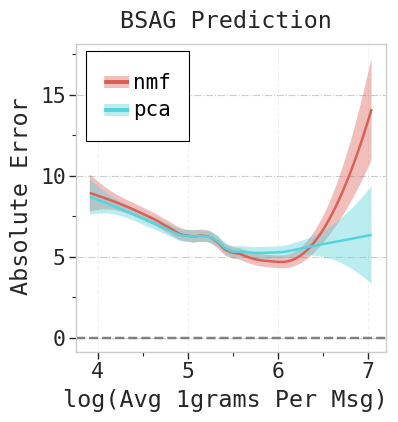

<ggplot: (8772181615168)>

In [145]:
df = delErr_bsag_p9_uni
df, x = df[df.feat_x == "a11_bsag_total_N500_bs8"], "delErr_model"
df.loc[df.feat_y == "_total1grams", "group_norm"] = np.log(df[df.feat_y == "_total1grams"]["group_norm"])
df.loc[df.feat_y == "_avg1gramsPerMsg", "group_norm"] = np.log(df[df.feat_y == "_avg1gramsPerMsg"]["group_norm"])
df = df[df.feat_y == "_avg1gramsPerMsg"]
df = df[df.delErr_model_type != "del_roba"]
df.loc[df.delErr_model_type == "del_nmf", "delErr_model_type"] = "nmf"
df.loc[df.delErr_model_type == "del_rpca", "delErr_model_type"] = "pca"

def plotter(df, x, y, title=None, facet=None):
    plot = (ggplot(df, aes(x=f'{x}', y=f'{y}', color=f"{facet}", fill=f"{facet}"))
        + geom_smooth(span=0.5, show_legend=True, method="loess", size=1, method_args={'degree':2})
        + labs(x="log(Avg 1grams Per Msg)", y="Absolute Error")
        + theme_seaborn(style="whitegrid", context="paper", font_scale=1.75, font="monospace")
        + geom_hline(yintercept = 0, color='gray', size=1, linetype="dashed")
        + theme(subplots_adjust={'wspace': 0.05}, figure_size=(4, 4), legend_title=element_blank(), panel_grid_major_x=element_line(linetype='dashed', alpha=0.25), panel_grid_major_y=element_line(linetype='dashdot',), legend_position=(.28, .75), legend_direction='vertical', legend_box_margin=0.05, legend_background=element_rect(fill='white'),legend_text=element_text(size=15))
        + ggtitle("BSAG Prediction")
        
        #+ scale_y_continuous(breaks = range(-1,12,2))
        )
    #if facet is not None: plot = plot + facet_wrap(f"{facet}", ncol=2, scales="fixed") 
    if title is not None: plot = plot + ggtitle(f"{title}")
    return plot


plot = plotter(df, "group_norm", "delErr_model", facet="delErr_model_type") 
plot.save(filename="./ErrorAnalysis/RPCA_NMFdeltaErrorAvg1gramsPerMsg_Bsag.pdf", format="pdf", dpi=250)
plot